In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names -O   

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84199  100 84199    0     0  27862      0  0:00:03  0:00:03 --:--:-- 27889
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   899k      0 --:--:-- --:--:-- --:--:--  902k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3305  100  3305    0     0  18567      0 --:--:-- --:--:-- --:--:-- 18672


In [2]:
!cat *.names

no missing values and looks like all values should be ints based on sensory data and score between 0 and 10.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
datasetwhite = pd.read_csv('winequality-white.csv', sep=';', names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [5]:
datasetwhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [6]:
datasetwhite.shape

(4899, 12)

In [7]:
datasetwhite.isnull().values.any()

False

check to see if there are any missing values in the data and there are none.

In [8]:
datasetwhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899
unique,69,126,88,311,161,133,252,891,104,80,105,8
top,6.8,0.28,0.3,1.2,0.044,29,111,0.992,3.14,0.5,9.4,6
freq,308,263,307,187,201,160,69,64,172,249,229,2198


In [9]:
datasetwhite.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

checked to see what all the items are and they are listed as objects. which is werid because the expected type would be integer.

In [10]:
datasetwhite['density'].unique()

array(['density', '1.001', '0.994', '0.9951', '0.9956', '0.9949',
       '0.9938', '0.9908', '0.9947', '0.992', '0.9912', '1.0002',
       '0.9914', '0.9928', '0.9892', '0.9917', '0.9955', '0.993',
       '0.9937', '0.9961', '0.9906', '0.9974', '0.9934', '0.9939',
       '0.9962', '0.9905', '0.9999', '0.9954', '0.9931', '0.995', '0.991',
       '0.9911', '0.9972', '0.9926', '0.9927', '0.9903', '0.9958',
       '0.9964', '0.9941', '0.9898', '0.9929', '0.9985', '0.9946',
       '0.9966', '0.9975', '0.9957', '0.99', '0.9899', '0.9916', '0.9969',
       '0.9979', '0.9913', '0.997', '1', '0.999', '0.9959', '0.9982',
       '0.9968', '0.9984', '0.9952', '0.9924', '0.9923', '0.9921',
       '0.9918', '0.9919', '0.9894', '0.998', '0.9932', '0.9896',
       '0.9902', '0.9936', '0.9942', '0.9973', '0.9944', '0.9989',
       '0.9971', '0.9998', '0.9976', '0.996', '0.9935', '0.9904',
       '0.9996', '0.9977', '0.9965', '0.9945', '0.9915', '0.9909',
       '0.9988', '0.9978', '0.9933', '0.9948', '

checked for anything that could change the attribute to an object and did not find anything really.

In [11]:
datasetwhite['density'] = pd.to_numeric(datasetwhite['density'], errors='coerce')
datasetwhite['fixed acidity'] = pd.to_numeric(datasetwhite['fixed acidity'], errors='coerce')
datasetwhite['volatile acidity'] = pd.to_numeric(datasetwhite['volatile acidity'], errors='coerce')
datasetwhite['citric acid'] = pd.to_numeric(datasetwhite['citric acid'], errors='coerce')
datasetwhite['residual sugar'] = pd.to_numeric(datasetwhite['residual sugar'], errors='coerce')
datasetwhite['chlorides'] = pd.to_numeric(datasetwhite['chlorides'], errors='coerce')
datasetwhite['free sulfur dioxide'] = pd.to_numeric(datasetwhite['free sulfur dioxide'], errors='coerce')
datasetwhite['total sulfur dioxide'] = pd.to_numeric(datasetwhite['total sulfur dioxide'], errors='coerce')
datasetwhite['pH'] = pd.to_numeric(datasetwhite['pH'], errors='coerce')
datasetwhite['sulphates'] = pd.to_numeric(datasetwhite['sulphates'], errors='coerce')
datasetwhite['alcohol'] = pd.to_numeric(datasetwhite['alcohol'], errors='coerce')
datasetwhite['quality'] = pd.to_numeric(datasetwhite['quality'], errors='coerce')

decided to convert all attributes to a float64 and change all null values to na.

In [12]:
datasetwhite.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [13]:
datasetwhite.isnull().values.any()

True

checked the changes and checked if there are still any missing values and there are from the conversion.

In [14]:
datasetwhite.dropna(inplace=True)

In [15]:
datasetwhite.isnull().values.any()

False

In [16]:
datasetwhite.shape

(4898, 12)

droped the missing values and checked the shape to see if any values were dropped.

# histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc586f37358>,
      dtype=object)

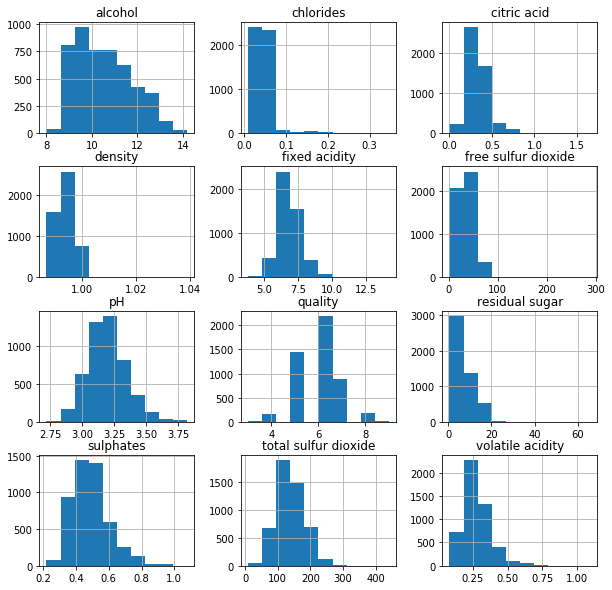

In [17]:
datasetwhite.hist(figsize=(10,10))

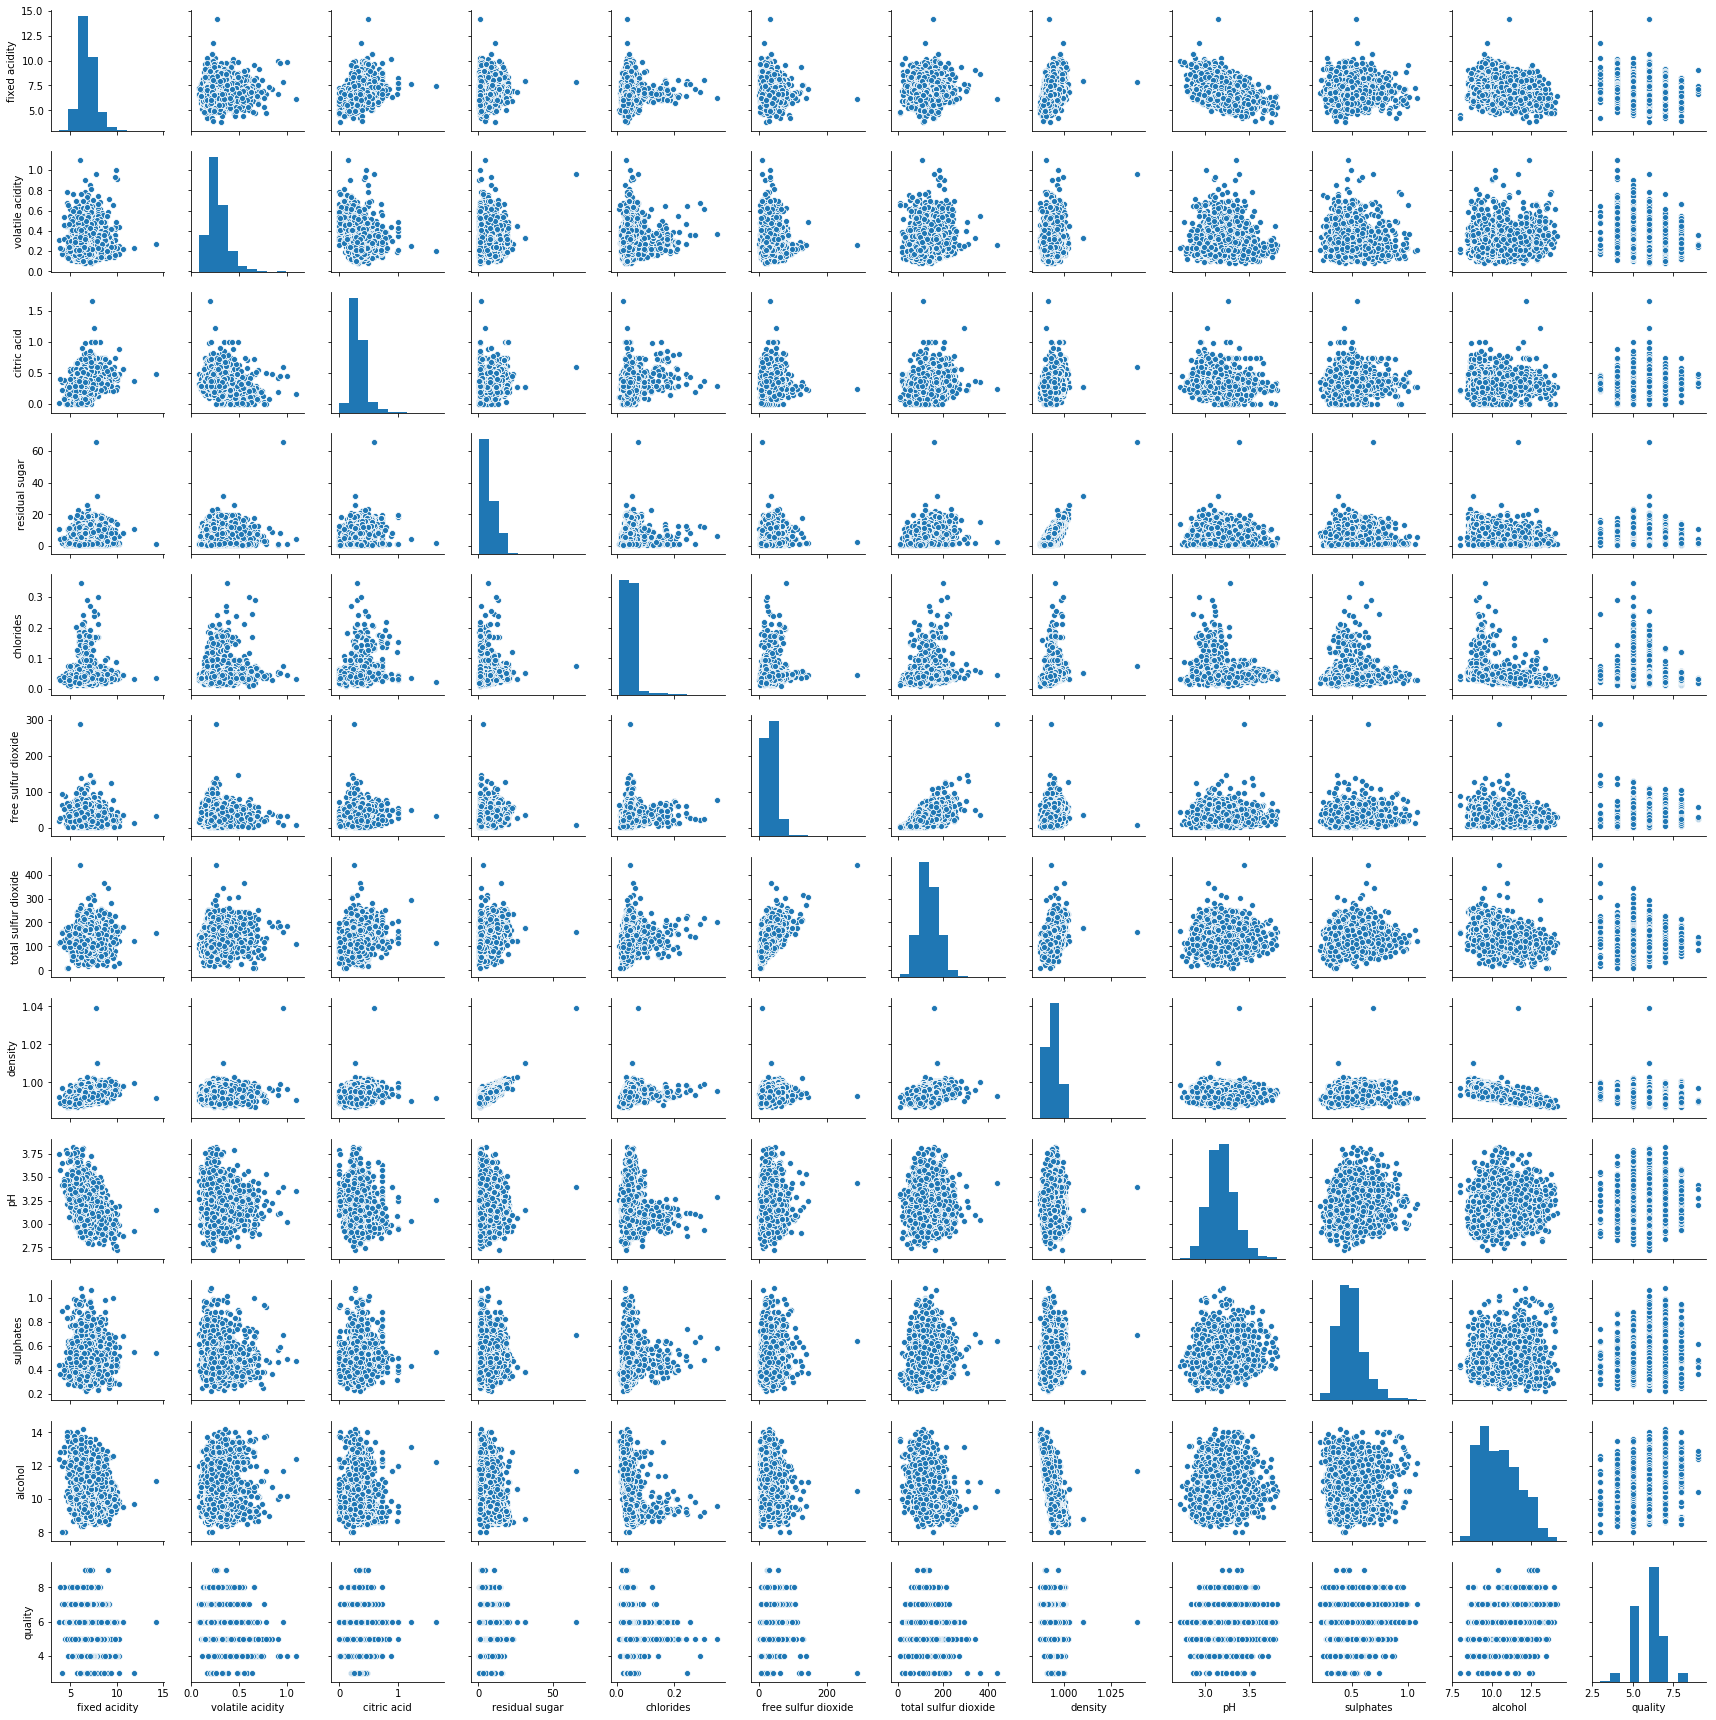

In [18]:
sns.pairplot(datasetwhite, height = 2.0)

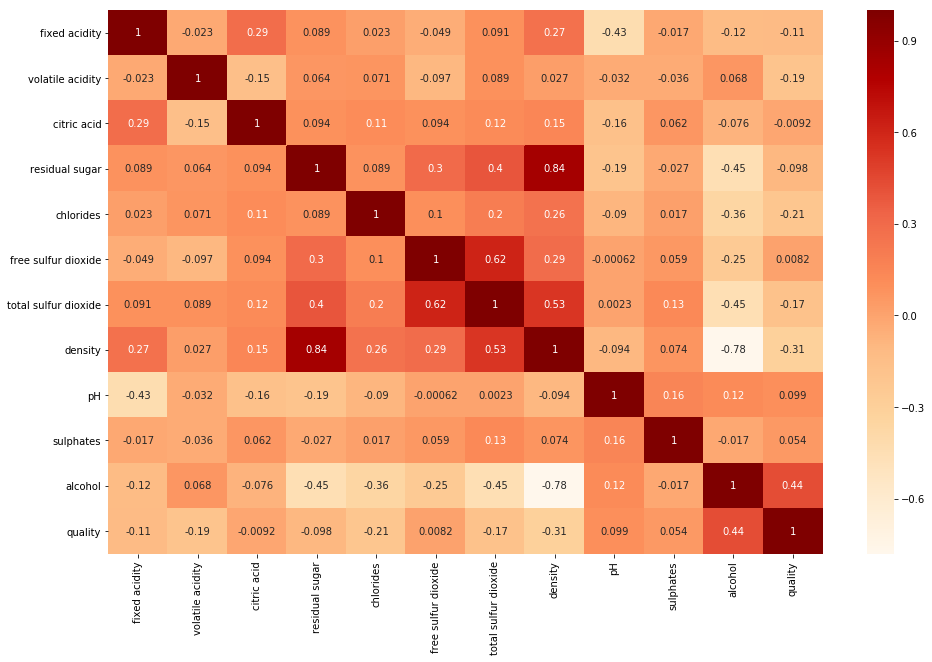

In [19]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = datasetwhite.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

density and residual sugar seem to have a big correlation while most of the other attributes does not. adensity also seems to correlate to the total sulfur dioxide and free sulfur dioxides does the same to total sulfur dioxide.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


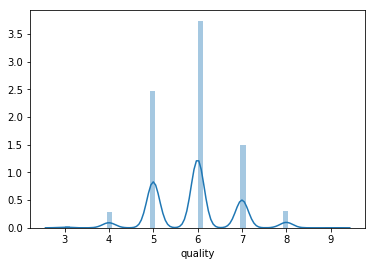

In [20]:
sns.distplot(datasetwhite['quality'])

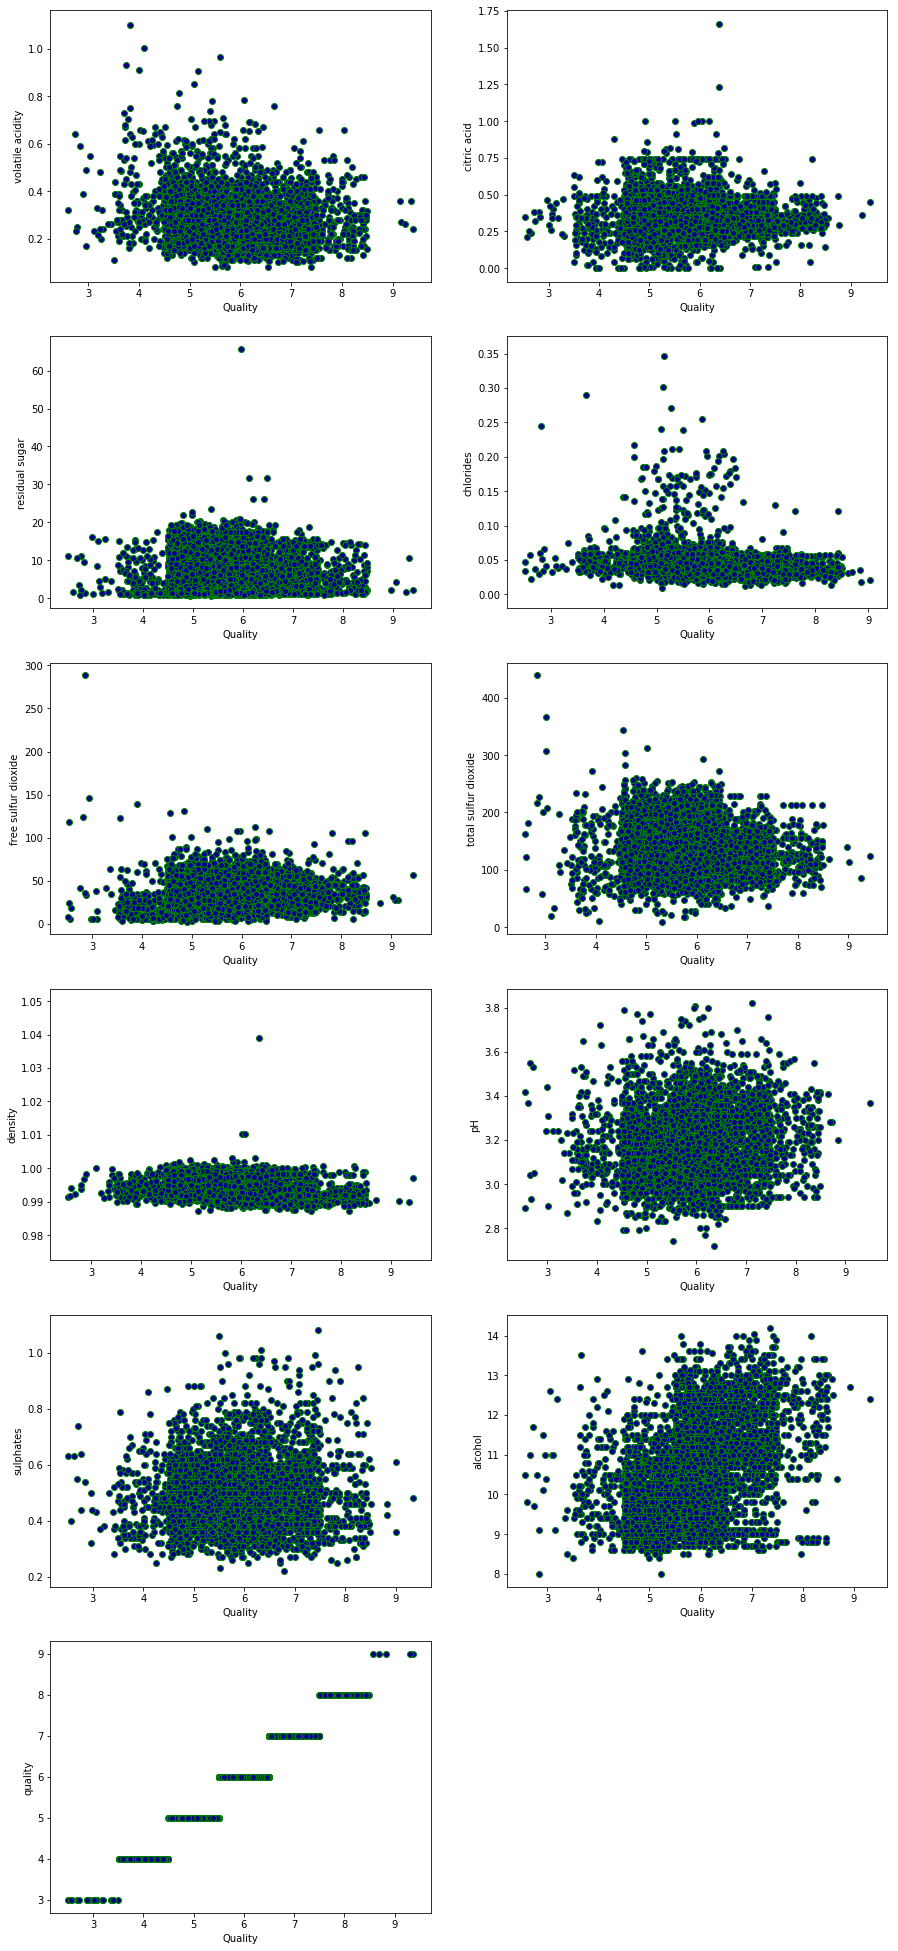

In [21]:
def fun(v):
    return v + np.random.uniform(low=-0.5, 
                                 high=0.5, 
                                 size=len(v))

plt.figure(figsize(15, 35))
for i in range (1, 12):
    plt.subplot(6, 2, i)
    plt.scatter(fun(datasetwhite['quality']), datasetwhite.iloc[:, i],
                   c="DarkBlue",
                   edgecolors="green")
    plt.xlabel('Quality')
    plt.ylabel(str(datasetwhite.columns[i]))

good quality wines tend to have low to medium attribute values but alchol and ph level. bad quality wines tend to have too much of one attribute such as citric acid or volatile acidity.

# machine learning


In [22]:
from sklearn.model_selection import train_test_split
x = datasetwhite.drop(['quality'],axis=1) 
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [23]:
y = datasetwhite['quality']
y.head()

1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
Name: quality, dtype: float64

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
train_x.shape

(3428, 11)

In [26]:
test_x.shape

(1470, 11)

setting up the trainning sets for the machine learning

# linear regression


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
modellinear = LinearRegression()
modellinear.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
modellinear.coef_

array([ 5.22779588e-02, -1.92810748e+00, -8.53514666e-02,  7.46503922e-02,
        2.87159821e-01,  4.62554345e-03, -1.70763258e-04, -1.31163736e+02,
        6.46916495e-01,  6.91335140e-01,  2.26296475e-01])

In [29]:
predicted = modellinear.predict(test_x)

Text(0, 0.5, 'Estimated quality')

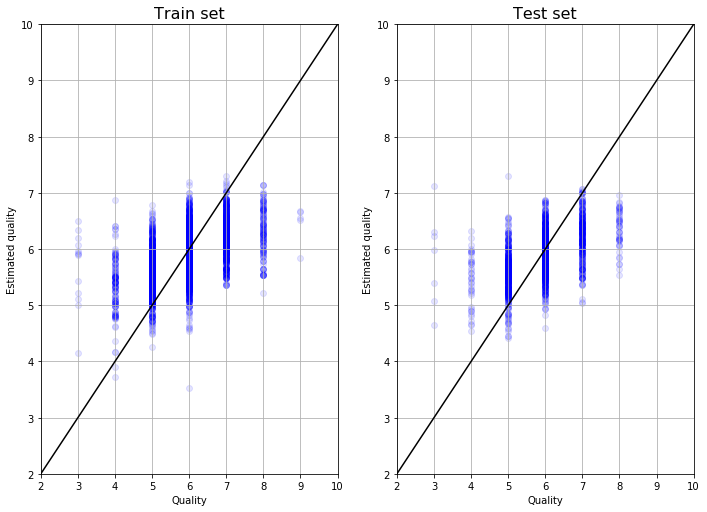

In [39]:
plt.figure(figsize(11.7,8.27))
plt.subplot(121)
pyplot.scatter(train_y, modellinear.predict(train_x), color="blue", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

plt.subplot(122)
pyplot.scatter(test_y, modellinear.predict(test_x), color="blue", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

the test set is more concentrated in the center ccompared to the train set but has more outliers that are spread apart and did not get any on the test as a 9 quality as there are a small amount in the train set.

In [31]:
modellinear.score(test_x,test_y)

0.2658687132478089

# random forest


In [32]:
from sklearn.ensemble import RandomForestClassifier
modelfr = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [33]:
modelfr.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
predicted2 = modelfr.predict(test_x)

Text(0, 0.5, 'Estimated quality')

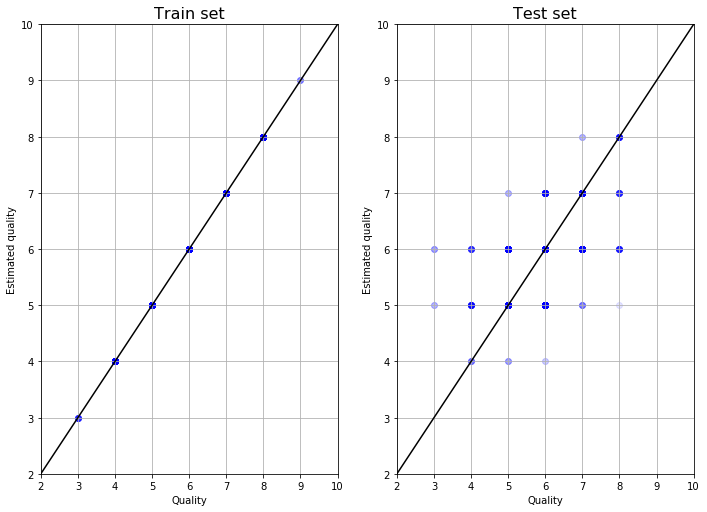

In [38]:
plt.figure(figsize(11.7,8.27))
plt.subplot(121)
pyplot.scatter(train_y, modelfr.predict(train_x), color="blue", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

plt.subplot(122)
pyplot.scatter(test_y, modelfr.predict(test_x), color="blue", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

In [36]:
modelfr.score(test_x,test_y)

0.6755102040816326